In [1]:
!nvidia-smi

Sun Mar 19 16:22:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import datetime
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-03-19 16:22:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  18.8MB/s    in 6.9s    

2023-03-19 16:22:45 (15.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
%load_ext tensorboard

In [4]:
import os

for dir_path, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dir_path}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [5]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [6]:
import matplotlib.image as mpimg
import random

def view_random(target_dir, target_class):
  target_folder = target_dir+target_class
  rand_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder+'/'+rand_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image Shape: {img.shape}')
  return img

Image Shape: (512, 512, 3)


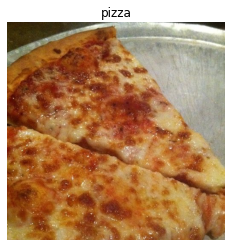

In [7]:
img_pizza = view_random(target_dir = 'pizza_steak/train/', target_class = 'pizza')


Image Shape: (512, 512, 3)


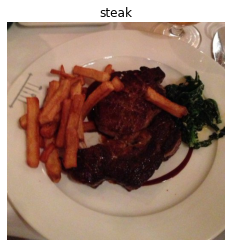

In [8]:
img_steak = view_random(target_dir = 'pizza_steak/train/', target_class = 'steak')

In [9]:
img_pizza = img_pizza/255.
img_steak = img_steak/255.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(
    train_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed= 42
)

test_data = train_datagen.flow_from_directory(
    test_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed= 42
)

model_1 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224,224, 3)),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(pool_size =2, padding = 'valid'),
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(pool_size =2, padding = 'valid'),
    Flatten(),
    Dense(1, activation  = 'sigmoid')
])

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks=[tensorboard_callback])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 240ms/step - loss: 0.6162 - accuracy: 0.6607 - val_loss: 0.3785 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4121 - accuracy: 0.8287 - val_loss: 0.3320 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3785 - accuracy: 0.8400 - val_loss: 0.3473 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3805 - accuracy: 0.8427 - val_loss: 0.3024 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3569 - accuracy: 0.8527 - val_loss: 0.2983 - val_accuracy: 0.8840


In [11]:
# !tensorboard dev upload --logdir logs --name "CNN Experiment" --description "Food datasets" 

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

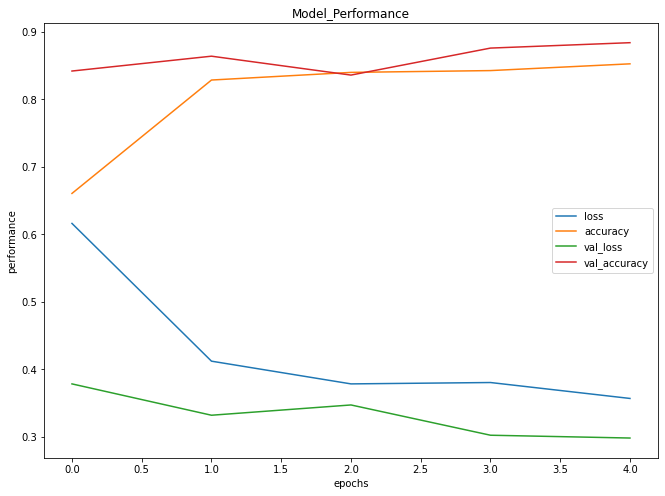

In [13]:
def plot_history(hist):
  model_history = pd.DataFrame(hist.history)
  model_history.plot(figsize=(11,8), title = 'Model_Performance', xlabel = 'epochs', ylabel = 'performance')

plot_history(history_1)

In [14]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=20)
test_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=20)

train_data = train_datagen.flow_from_directory(
    train_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed= 42
)

test_data = train_datagen.flow_from_directory(
    test_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed= 42
)

model_2 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224,224, 3)),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(pool_size =2, padding = 'valid'),
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(pool_size =2, padding = 'valid'),
    Flatten(),
    Dense(1, activation  = 'sigmoid')
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)




history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 600ms/step - loss: 0.5764 - accuracy: 0.6847 - val_loss: 0.4626 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 28s 595ms/step - loss: 0.4490 - accuracy: 0.7947 - val_loss: 0.3702 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 29s 605ms/step - loss: 0.4232 - accuracy: 0.8140 - val_loss: 0.3694 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 28s 592ms/step - loss: 0.4159 - accuracy: 0.8073 - val_loss: 0.3621 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 28s 594ms/step - loss: 0.4005 - accuracy: 0.8293 - val_loss: 0.3234 - val_accuracy: 0.8580


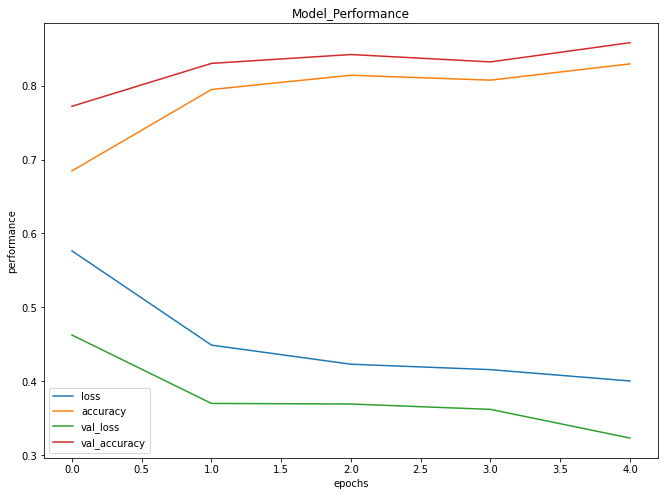

In [15]:
plot_history(history_2)

In [31]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 10)      

In [19]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True)

train_data = train_datagen.flow_from_directory(
    train_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed= 42
)

test_data = train_datagen.flow_from_directory(
    test_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed= 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
model_3 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape= (224, 224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
    
    
])

model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [24]:
history_3 = model_3.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 30s 587ms/step - loss: 0.6462 - accuracy: 0.6200 - val_loss: 0.6088 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 27s 581ms/step - loss: 0.5558 - accuracy: 0.7227 - val_loss: 0.4797 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 28s 598ms/step - loss: 0.5152 - accuracy: 0.7480 - val_loss: 0.4366 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 27s 586ms/step - loss: 0.4851 - accuracy: 0.7680 - val_loss: 0.4095 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 31s 667ms/step - loss: 0.4953 - accuracy: 0.7707 - val_loss: 0.4301 - val_accuracy: 0.7980


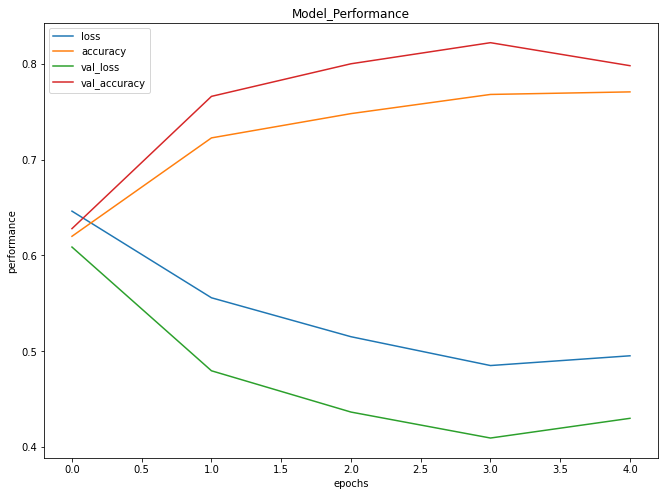

In [25]:
plot_history(history_3)

In [27]:
model_4 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape= (224, 224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
    
])

model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [28]:
history_4 = model_4.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 29s 584ms/step - loss: 0.5959 - accuracy: 0.6687 - val_loss: 0.4434 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 31s 667ms/step - loss: 0.5453 - accuracy: 0.7247 - val_loss: 0.4484 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 28s 594ms/step - loss: 0.4837 - accuracy: 0.7660 - val_loss: 0.4151 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 28s 602ms/step - loss: 0.4865 - accuracy: 0.7733 - val_loss: 0.4007 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 27s 586ms/step - loss: 0.4639 - accuracy: 0.7800 - val_loss: 0.3852 - val_accuracy: 0.8240


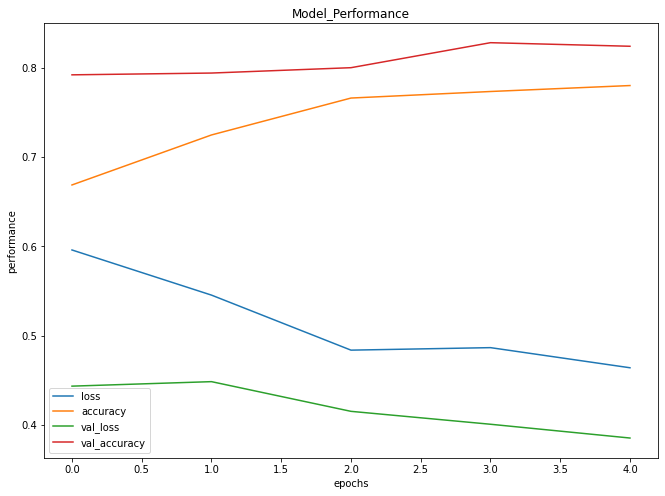

In [29]:
plot_history(history_4)

In [30]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 10)      

In [43]:
def pred_file_random(model_name, class_val):  
  input_val= input()
  img_pred = view_random(target_dir = 'pizza_steak/test/', target_class = input_val)
  # img = tf.image.decode_image(img_pred, channels = 3)
  img = tf.image.resize(img_pred, size = (224,224))
  img = img/.255
  img = tf.expand_dims(img, axis = 0)
  pred_val = model_name.predict(img)
  print(f'Predicted Class = {class_val[int(tf.round(pred_val)[0][0])]}')



steak
Image Shape: (512, 384, 3)
1/1 [==============================] - 0s 21ms/step
Predicted Class = steak


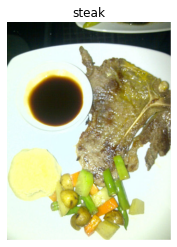

In [44]:
pred_file_random(model_4, class_names)

